## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import plotly.express as px
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/drive')


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
LoanDF = pd.read_csv('/drive/MyDrive/Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [ ]:
LoanDFCopy = LoanDF.copy() # copy to a data frame
LoanDFCopy.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


* copied the data frame to avoid updating the original data set. Describe the data set to view the statistical information of the entire dataset
* Experience has a negative value which we need to consider while data featuring. there might be some invalid data in this column.
* there is no missing values in any column which we can say a good data set.
* Zip code column also needs to be considered for data modification.

In [ ]:
LoanDFCopy.head() # display first 5 records

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
LoanDFCopy.tail() # display last 5 records

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
LoanDFCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There is no missing data in the data set provided. Data Types Provioded are Integers and float(no categorical)

In [ ]:
LoanDFCopy.ID.nunique()


5000

* The total data set has unique values.

In [ ]:
# filtering non-numeric columns
cat_columns = LoanDFCopy.select_dtypes(exclude=np.number).columns
cat_columns

Index([], dtype='object')

In [ ]:
# we will skip the title and description columns as they will have a lot of unique values
cat_col = ['ZIPCode', 'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(LoanDFCopy[column].value_counts())
    print("-" * 50)

ZIPCode
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94970      1
90068      1
90813      1
94404      1
94598      1
Name: count, Length: 467, dtype: int64
--------------------------------------------------
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64
--------------------------------------------------
Personal_Loan
0    4520
1     480
Name: count, dtype: int64
--------------------------------------------------
Securities_Account
0    4478
1     522
Name: count, dtype: int64
--------------------------------------------------
CD_Account
0    4698
1     302
Name: count, dtype: int64
--------------------------------------------------
Online
1    2984
0    2016
Name: count, dtype: int64
--------------------------------------------------
CreditCard
0    3530
1    1470
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
LoanDFCopy = LoanDFCopy.drop(["ID"], axis=1)


The ID column is dropped as those are all unique values and doesn't adds values to the prediction.

In [ ]:
LoanDFCopy["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# Correcting the experience values
LoanDFCopy["Experience"].replace(-1, 1, inplace=True)
LoanDFCopy["Experience"].replace(-2, 2, inplace=True)
LoanDFCopy["Experience"].replace(-3, 3, inplace=True)


* the Experience column is cleaned up to remove invalid data i.e negative values were made positive

In [ ]:
LoanDFCopy["ZIPCode"] = LoanDFCopy["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    LoanDFCopy["ZIPCode"].str[0:2].nunique(),
)
LoanDFCopy["ZIPCode"] = LoanDFCopy["ZIPCode"].str[0:2]

LoanDFCopy["ZIPCode"] = LoanDFCopy["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
LoanDFCopy[cat_cols] = LoanDFCopy[cat_cols].astype("category")
LoanDFCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


In [ ]:
LoanDFCopy.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

<Axes: ylabel='Mortgage'>

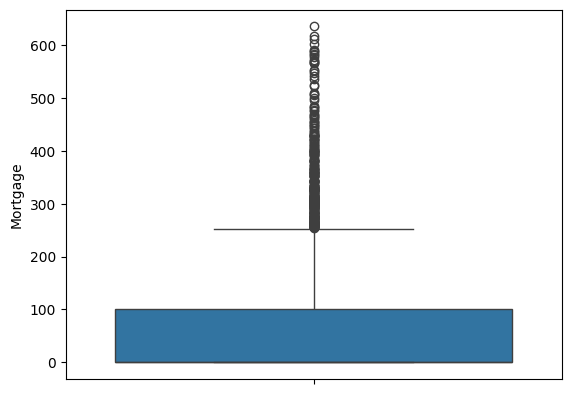

In [ ]:
# Q1 What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
sns.boxplot(LoanDFCopy,y = 'Mortgage')

* the outliers is after 250

In [ ]:
# Q2 How many customers have credit cards?
plt.figure(figsize=(20,7))
DF = LoanDFCopy[LoanDFCopy['CreditCard'] == 1]
CreditCard_holders = len(DF)
print("The total number of credit card holders are: ", CreditCard_holders)
DF1 = LoanDFCopy[LoanDFCopy['CreditCard'] == 0]
Non_CreditCard_holders = len(DF1)
print("The total number of non credit card holders are: ", Non_CreditCard_holders)
DF2 = LoanDFCopy[LoanDFCopy['Personal_Loan'] == 1]
Personal_Loan_holders = len(DF2)
print("The total number of personal loan holders are: ", Personal_Loan_holders)
DF3 = LoanDFCopy[LoanDFCopy['Personal_Loan'] == 0]
Non_Personal_Loan_holders = len(DF3)
print("The total number of non personal loan holders are: ", Non_Personal_Loan_holders)

The total number of credit card holders are:  1470
The total number of non credit card holders are:  3530
The total number of personal loan holders are:  480
The total number of non personal loan holders are:  4520


<Figure size 2000x700 with 0 Axes>

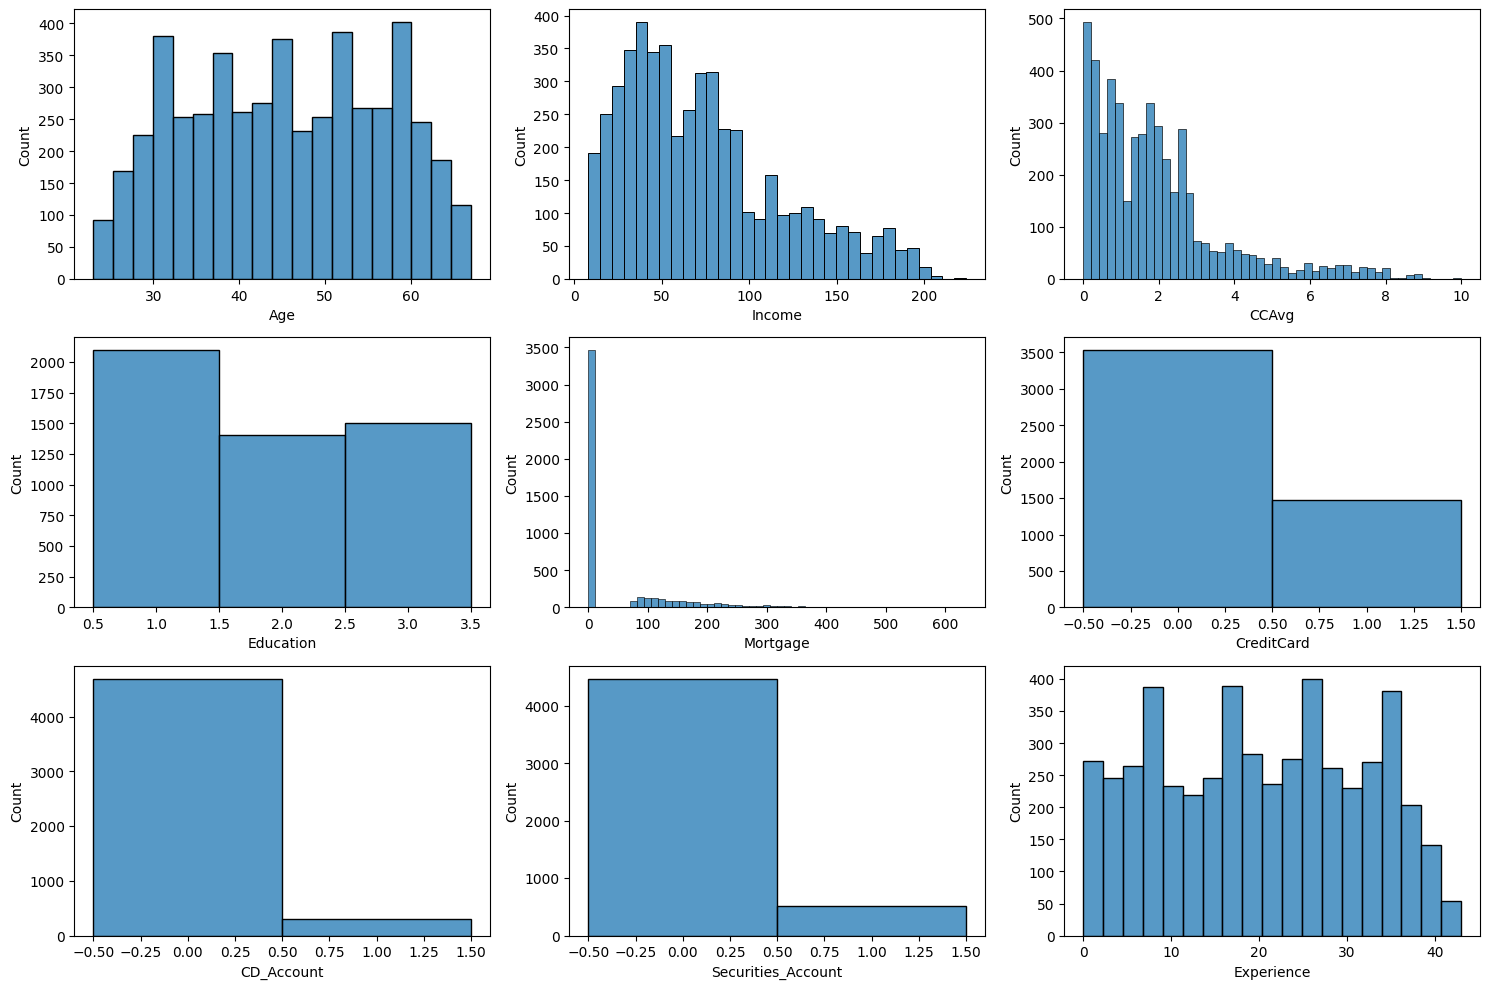

In [ ]:
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
num_features = ['Age', 'Income', 'CCAvg','Education','Mortgage','CreditCard','CD_Account','Securities_Account','Experience']

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=LoanDFCopy, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

* Income and CCAvg displays right skewed while Education  and Age are distributed

<Axes: xlabel='Experience'>

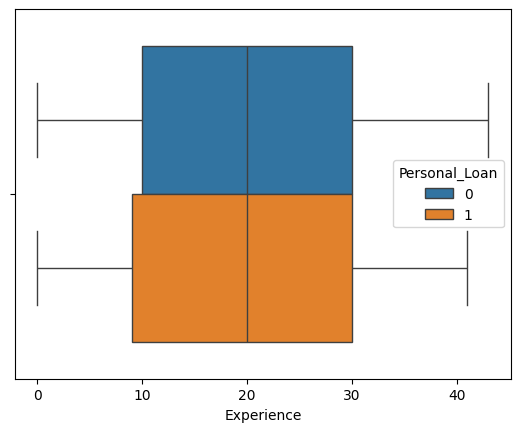

In [ ]:
sns.boxplot(LoanDFCopy,x=LoanDFCopy['Experience'],hue = 'Personal_Loan')

* Boxplot of the experience field  w.r.t personal load shows, its almost similar and experience doesn't matter

<Axes: xlabel='Family', ylabel='count'>

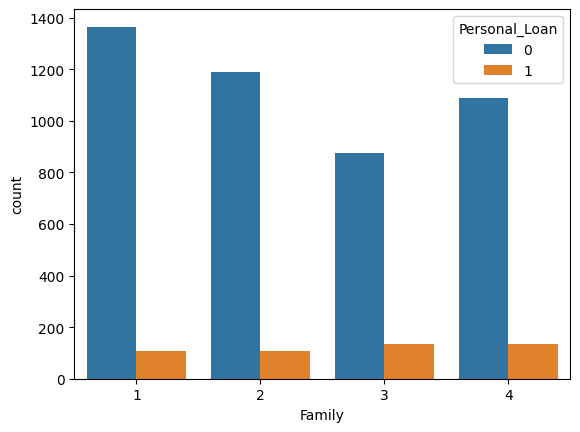

In [ ]:
sns.countplot(LoanDFCopy,x=LoanDFCopy['Family'],hue = 'Personal_Loan')

* this countplot of family column w.r.t personal loan shows personal loan  doesn't depend on the size of the family.

<Axes: xlabel='Income'>

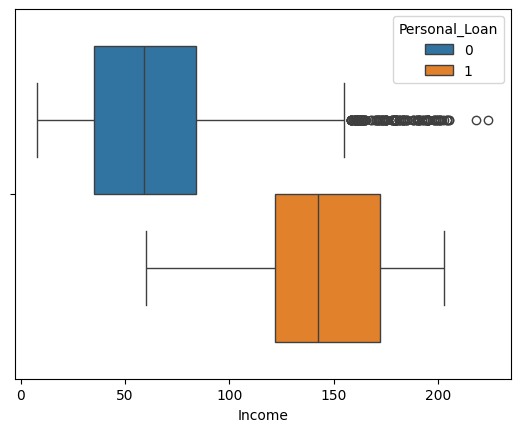

In [ ]:
sns.boxplot(LoanDFCopy,x=LoanDFCopy['Income'], hue = 'Personal_Loan')

* Customers with high annual incomes have Personal Loan, so Income column is a driving factor for the problem statement.

<Axes: xlabel='Age'>

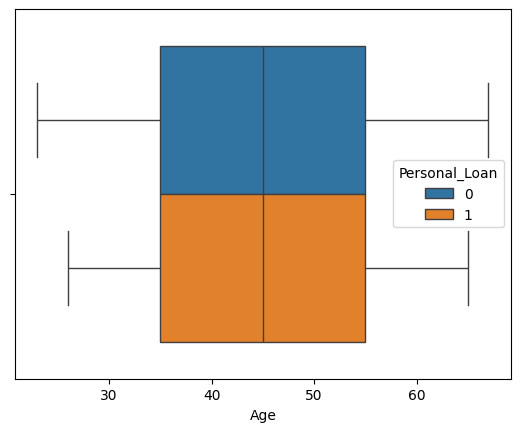

In [ ]:
#Q4 How does a customer's interest in purchasing a loan vary with their age?
sns.boxplot(LoanDFCopy,x=LoanDFCopy['Age'], hue = 'Personal_Loan')

* Age column doesn't matter for offering loan or identifying customers.

<Axes: xlabel='CCAvg'>

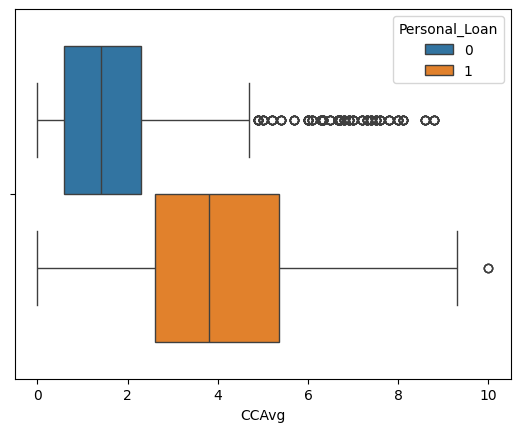

In [ ]:
sns.boxplot(LoanDFCopy,x=LoanDFCopy['CCAvg'], hue = 'Personal_Loan')

* This boxplot shows Credit card average does impact the personal loan application/approval.

<Axes: xlabel='Education', ylabel='count'>

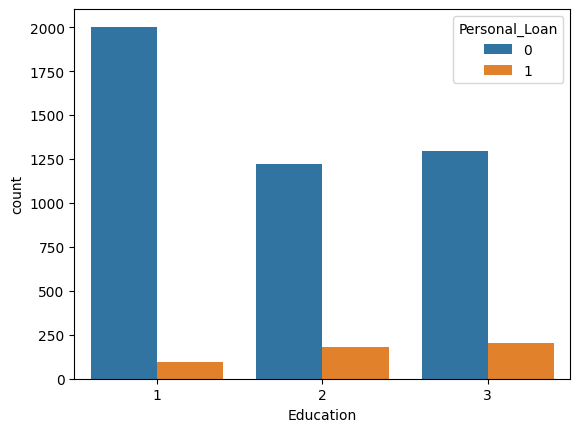

In [ ]:
# Q5 How does a customer's interest in purchasing a loan vary with their education?
sns.countplot(LoanDFCopy,x=LoanDFCopy['Education'], hue = 'Personal_Loan')

* this count plot shows how the education varies with the personal loan, the count of highest educated customers have taken/approved personal loan in comparsion to lower educated persons.

* the count plot of family shows family of more numbers test to take up

<Axes: xlabel='CD_Account', ylabel='count'>

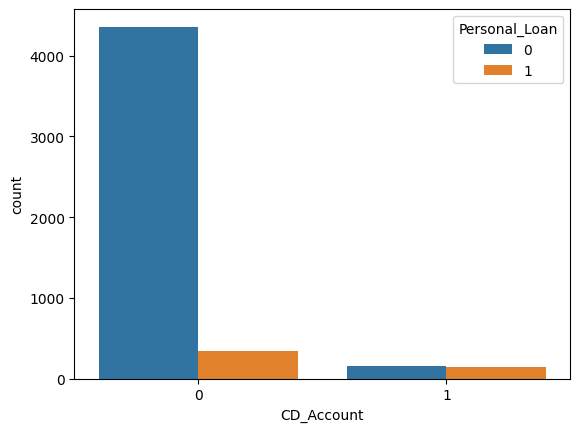

In [ ]:
sns.countplot(LoanDFCopy,x=LoanDFCopy['CD_Account'], hue = 'Personal_Loan')

* customer those who do not have CD Account have been given personal loan than customer with CD Account

<Axes: xlabel='Securities_Account', ylabel='count'>

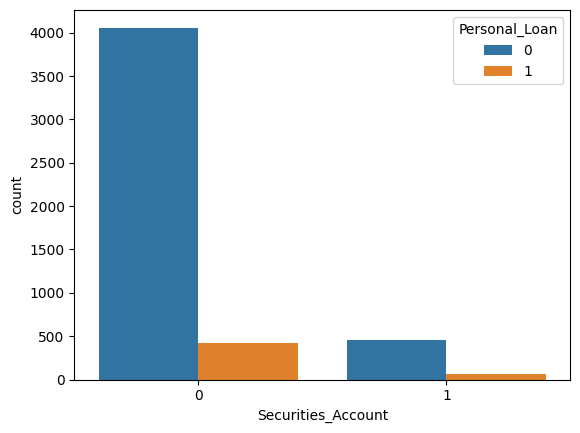

In [ ]:
sns.countplot(LoanDFCopy,x=LoanDFCopy['Securities_Account'], hue = 'Personal_Loan')

 * customer those who do not have Securities Account have been given personal loan than customer with Securities Account

<Axes: >

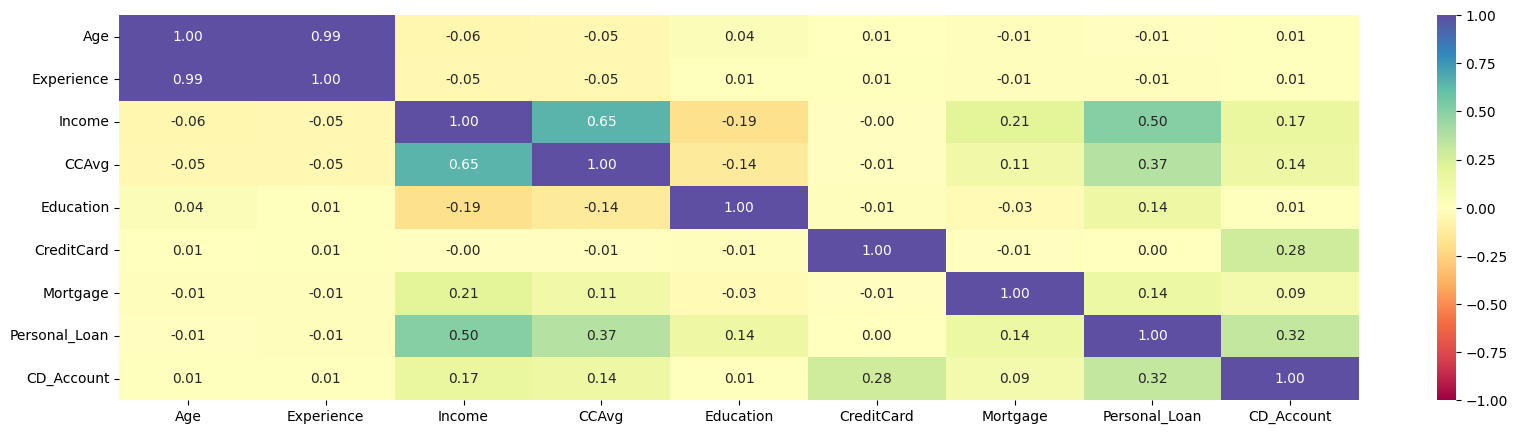

In [ ]:
plt.figure(figsize=(20, 5))
features = ['Age','Experience','Income', 'CCAvg','Education','CreditCard','Mortgage','Personal_Loan','CD_Account']
sns.heatmap(LoanDFCopy[features].corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

Q3 What are the attributes that have a strong correlation with the target attribute (personal loan)?

#Observations
* Personall Loan is highly positively cocorelated to Income 0.50 and moderate positivly coorelated to CC Avg 0.37 , positively co related to Education 0.14 and Mortgage 0.14 but not so strong.
* and moderately positivly corelated to CD_Account 0.32

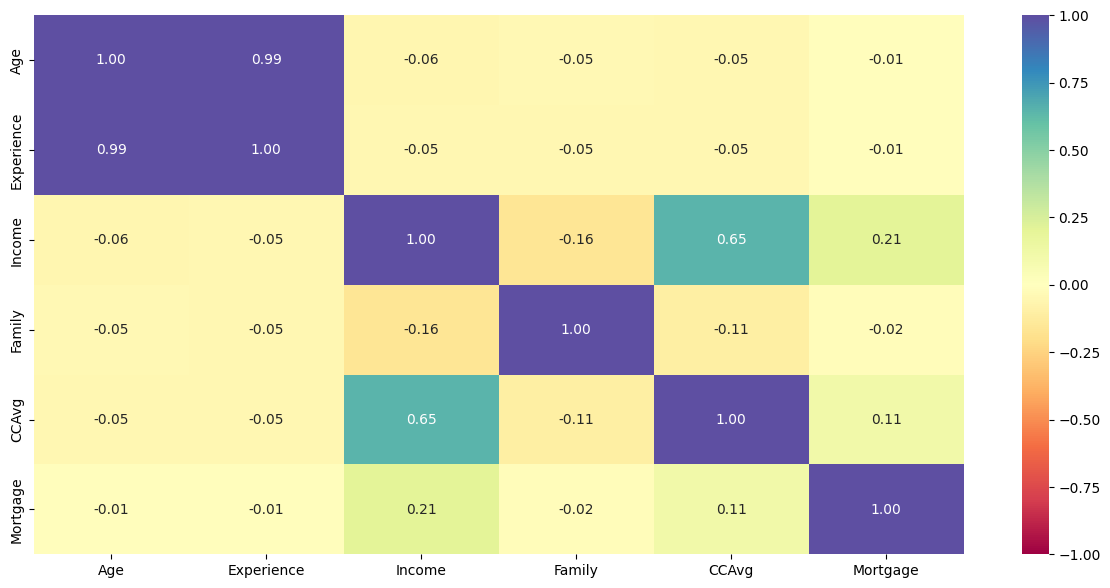

In [ ]:
# plotting the heatmap for correlation with refined columns
plt.figure(figsize=(15, 7))
sns.heatmap(LoanDFCopy.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

###Observations
* Age with Experience are strongly coorelated eith strong positive strenght
* CC Avg is positively corelated to Income
* Mortage is positevely corelated to Income but the strength is moderate
* Mortage is also positively corelated to CC Avg but streangh is weak
* Income and CCAvg are negatively corelated to Education
* Family and Income are also negatevely correlated

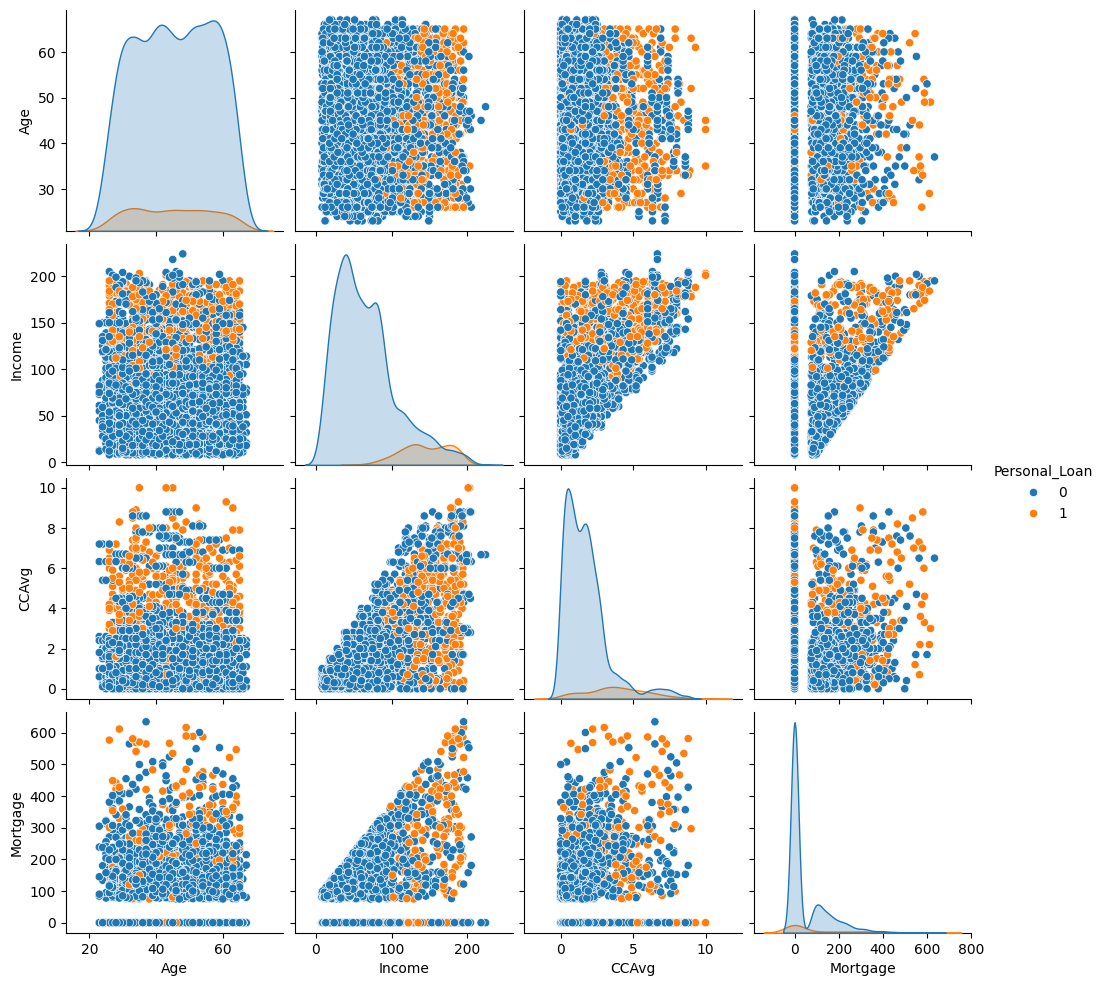

In [ ]:
pair_features = ['Age', 'Income', 'CCAvg','Mortgage']
sns.pairplot(LoanDFCopy,vars =pair_features, hue = 'Personal_Loan',diag_kind='kde')

In [ ]:
# correlation of Age with the target attribute (personal loan)?
corr1 = LoanDFCopy['Personal_Loan'].corr(LoanDFCopy['Age'])
print(corr1)

-0.007725617173534074


* Personal Loan is negatively corelated to Age

In [ ]:
corr2 = LoanDFCopy['Personal_Loan'].corr(LoanDFCopy['Education'])
print(corr2)

0.13672155003028105


* with the Heat map and above correlation we see personal loan is highly positvly coorelated to Education  so there is a great oppertunity to pull the customers those who are highly educated can be given personal loan.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
#check any missing values check show that there is no missing values in the data set
LoanDFCopy.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


In [ ]:
# outlier detection using IQR method
Q1 = LoanDFCopy.select_dtypes(include=["float64", "int64"]).quantile(0.25)
Q3 = LoanDFCopy.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

print("Lower bounds:\n", lower)
print("Upper bounds:\n", upper )

Lower bounds:
 Age             5.0
Experience    -20.0
Income        -49.5
Family         -2.0
CCAvg          -2.0
Mortgage     -151.5
dtype: float64
Upper bounds:
 Age            85.0
Experience     60.0
Income        186.5
Family          6.0
CCAvg           5.2
Mortgage      252.5
dtype: float64


* there is no outliers for Pesonal Loan(Target variable) , Securities_Account and CD_Account.

In [ ]:
(
    (LoanDFCopy.select_dtypes(include=["float64", "int64"]) < lower)
    | (LoanDFCopy.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(LoanDFCopy) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


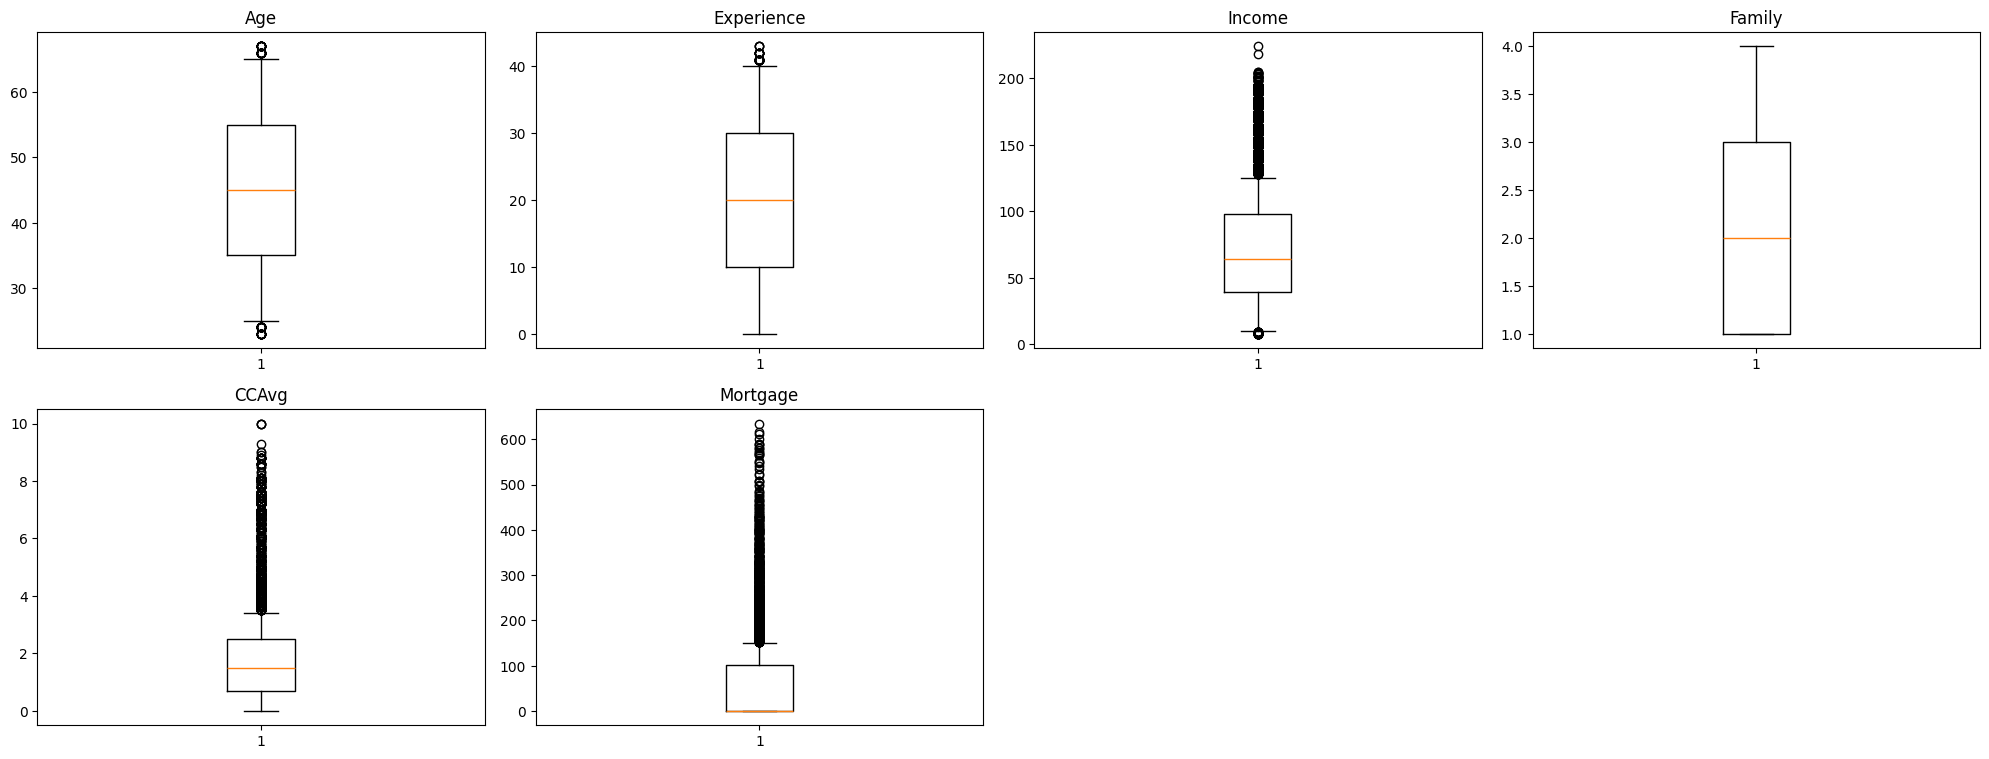

In [ ]:
# outlier display using boxplot
numeric_columns = LoanDFCopy.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(LoanDFCopy[variable], whis=0.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are quite a few outliers in the data as found in the display and with IQR method.

In [ ]:
XVal = LoanDFCopy.drop(["Personal_Loan", "Experience"], axis=1)
YVal = LoanDFCopy["Personal_Loan"]

XVal = pd.get_dummies(XVal, columns=["ZIPCode","Education"], drop_first=True)
XVal = XVal.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(XVal, YVal, test_size=0.30, random_state=1)

* dropping Personal Loan and Experience column in X Value  
* selecting Personal Loan in Y value as this is the target column.

## Model Building

### Model Evaluation Criterion

In [1]:
XVal.head()
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

NameError: name 'XVal' is not defined

### Model Building

#### Defining a function to compute different metrics to check performance of a classification model built using sklearn for all models

In [ ]:

def model_performance_classification_sklearn(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)
    # to compute Accuracy
    acc = accuracy_score(target, pred)
    # to compute Recall
    recall = recall_score(target, pred)
    # to compute Precision
    precision = precision_score(target, pred)
    # to compute F1-score
    f1 = f1_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


### Defining a function to build confusion matrix for models

In [ ]:
def confusion_matrix_skl(model, predictors, target):

    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cmat = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cmat.flatten().sum())]
            for item in cmat.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cmat, annot=labels, fmt="")

    # Add a label to the  x and y-axis
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# creating an instance of the decision tree model with random state =1

LoanDTree1 = DecisionTreeClassifier(criterion="gini",random_state=1)

# fitting the model to the training data
LoanDTree1.fit(X_train, y_train)



DecisionTreeClassifier(random_state=1)

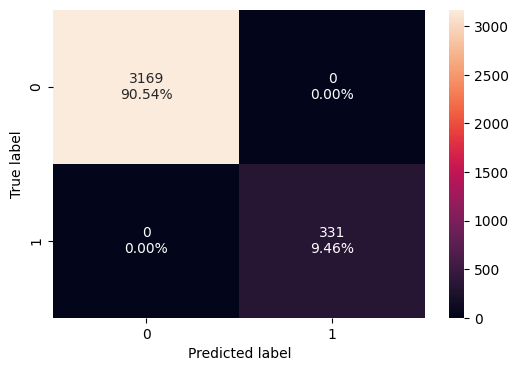

In [ ]:
#confusion matrix for the training data
confusion_matrix_skl(LoanDTree1, X_train, y_train)

True Negative : 90.54%( actual outcome is negative) , True Positive : 9.46% (actual outcome is positive)

In [ ]:
LoanDTree_train_perf = model_performance_classification_sklearn(LoanDTree1, X_train, y_train)
LoanDTree_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* this is the performance of training data for model with **random state 1**

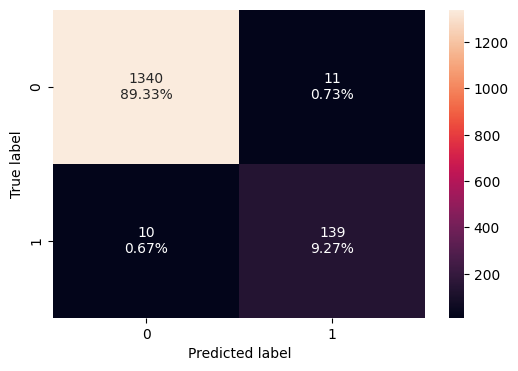

In [ ]:
confusion_matrix_skl(LoanDTree1, X_test, y_test)

True Nagative : 1339 , True Positive : 134 , False Positive:15 , False Negative 12

In [ ]:
LoanDTree_test_perf = model_performance_classification_sklearn(LoanDTree1, X_test, y_test)
LoanDTree_test_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


this is the performance of test data for model with **random state 1**

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


* Create the tree with the features names in X_train

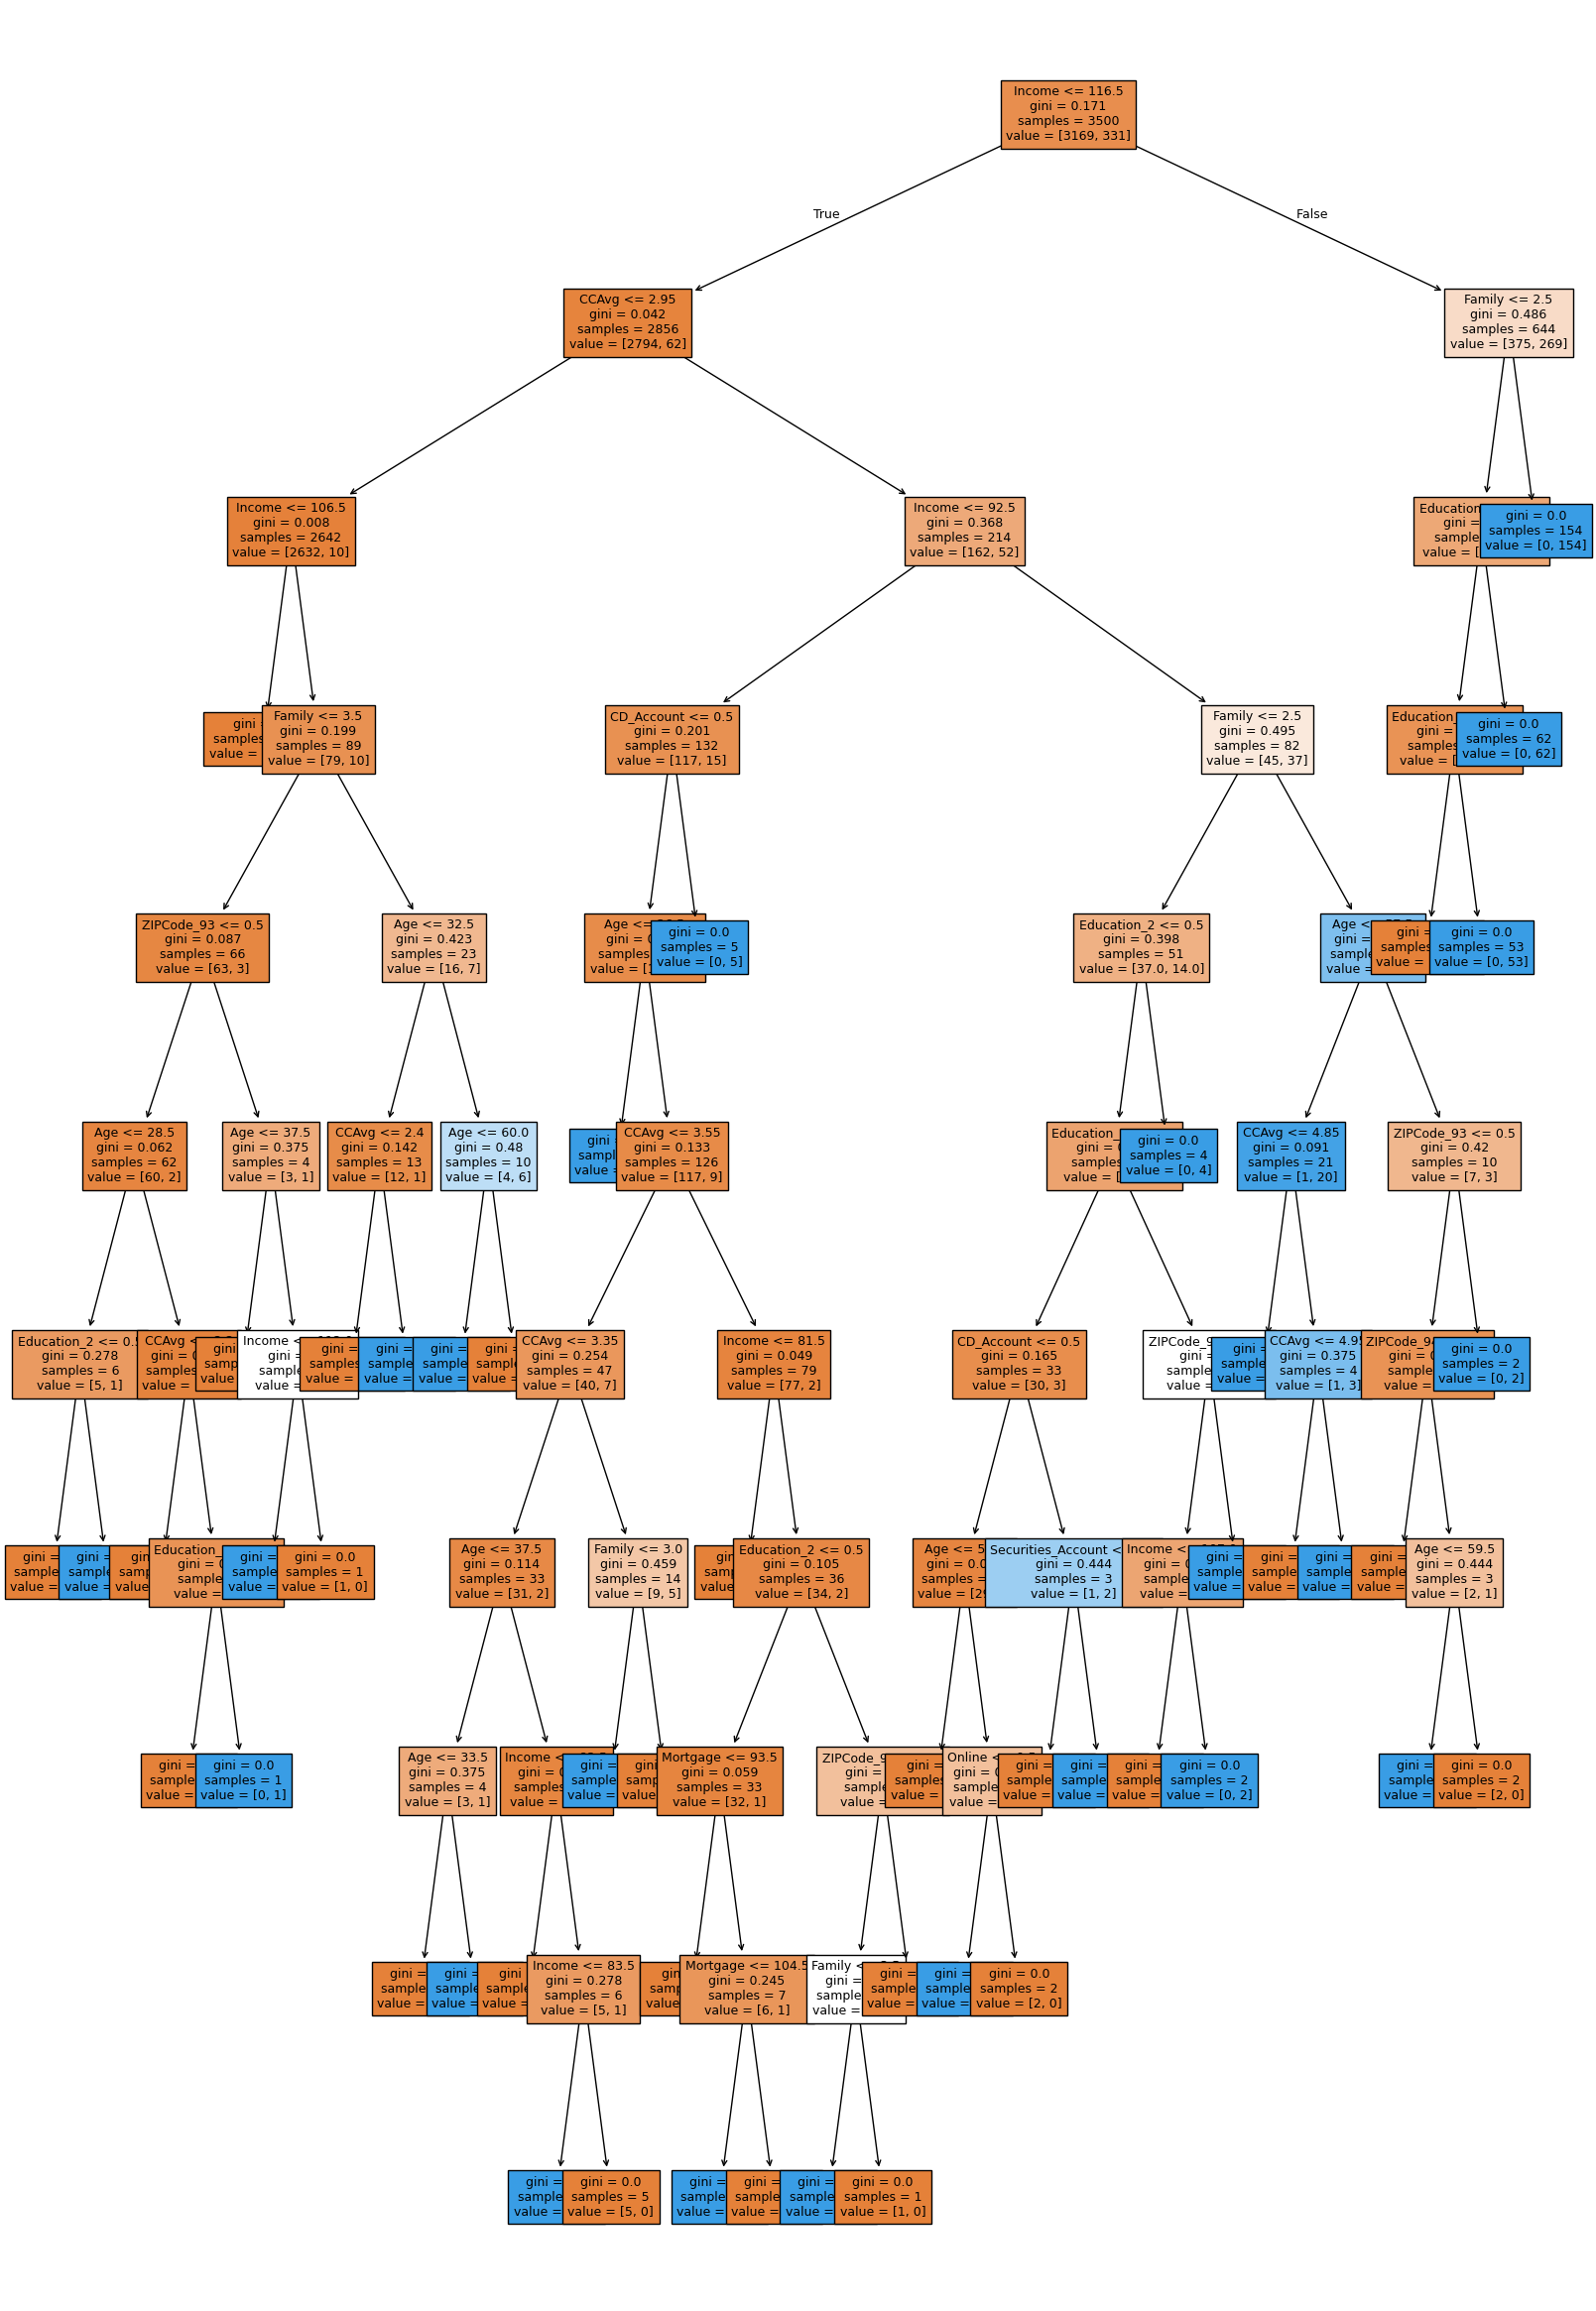

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    LoanDTree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* The tree looks complex , hence lets create a tree with class_weight parameter

**decision Tree class_weight = "balanced"**

In [ ]:
LoanDTree2 = DecisionTreeClassifier(random_state=1,class_weight = "balanced")
LoanDTree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

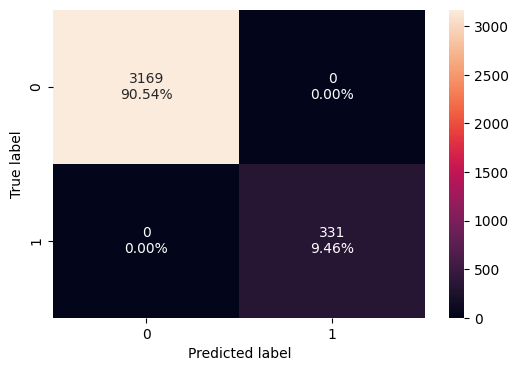

In [ ]:
confusion_matrix_skl(LoanDTree2, X_train, y_train)

In [ ]:
LoanDTree_train_perf_balanced = model_performance_classification_sklearn(LoanDTree2, X_train, y_train)
LoanDTree_train_perf_balanced

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* run the performance for deision tree (on training data) 2 where class_weight = balanced

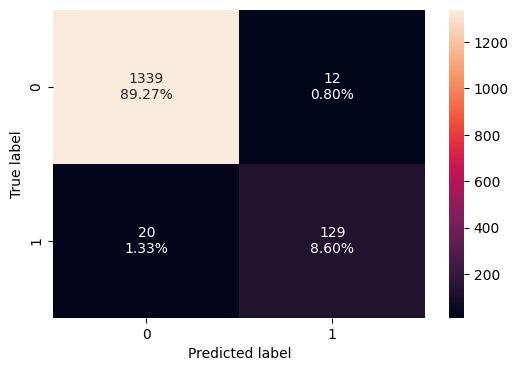

In [ ]:
confusion_matrix_skl(LoanDTree2, X_test, y_test)

In [ ]:
LoanDTree_test_perf_balanced = model_performance_classification_sklearn(LoanDTree2, X_test, y_test)
LoanDTree_test_perf_balanced

,Accuracy,Recall,Precision,F1
0,0.978667,0.865772,0.914894,0.889655


* Run the performance on test data for the decision tree with class_weight = balanced

In [ ]:
feature_names = list(X_test.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


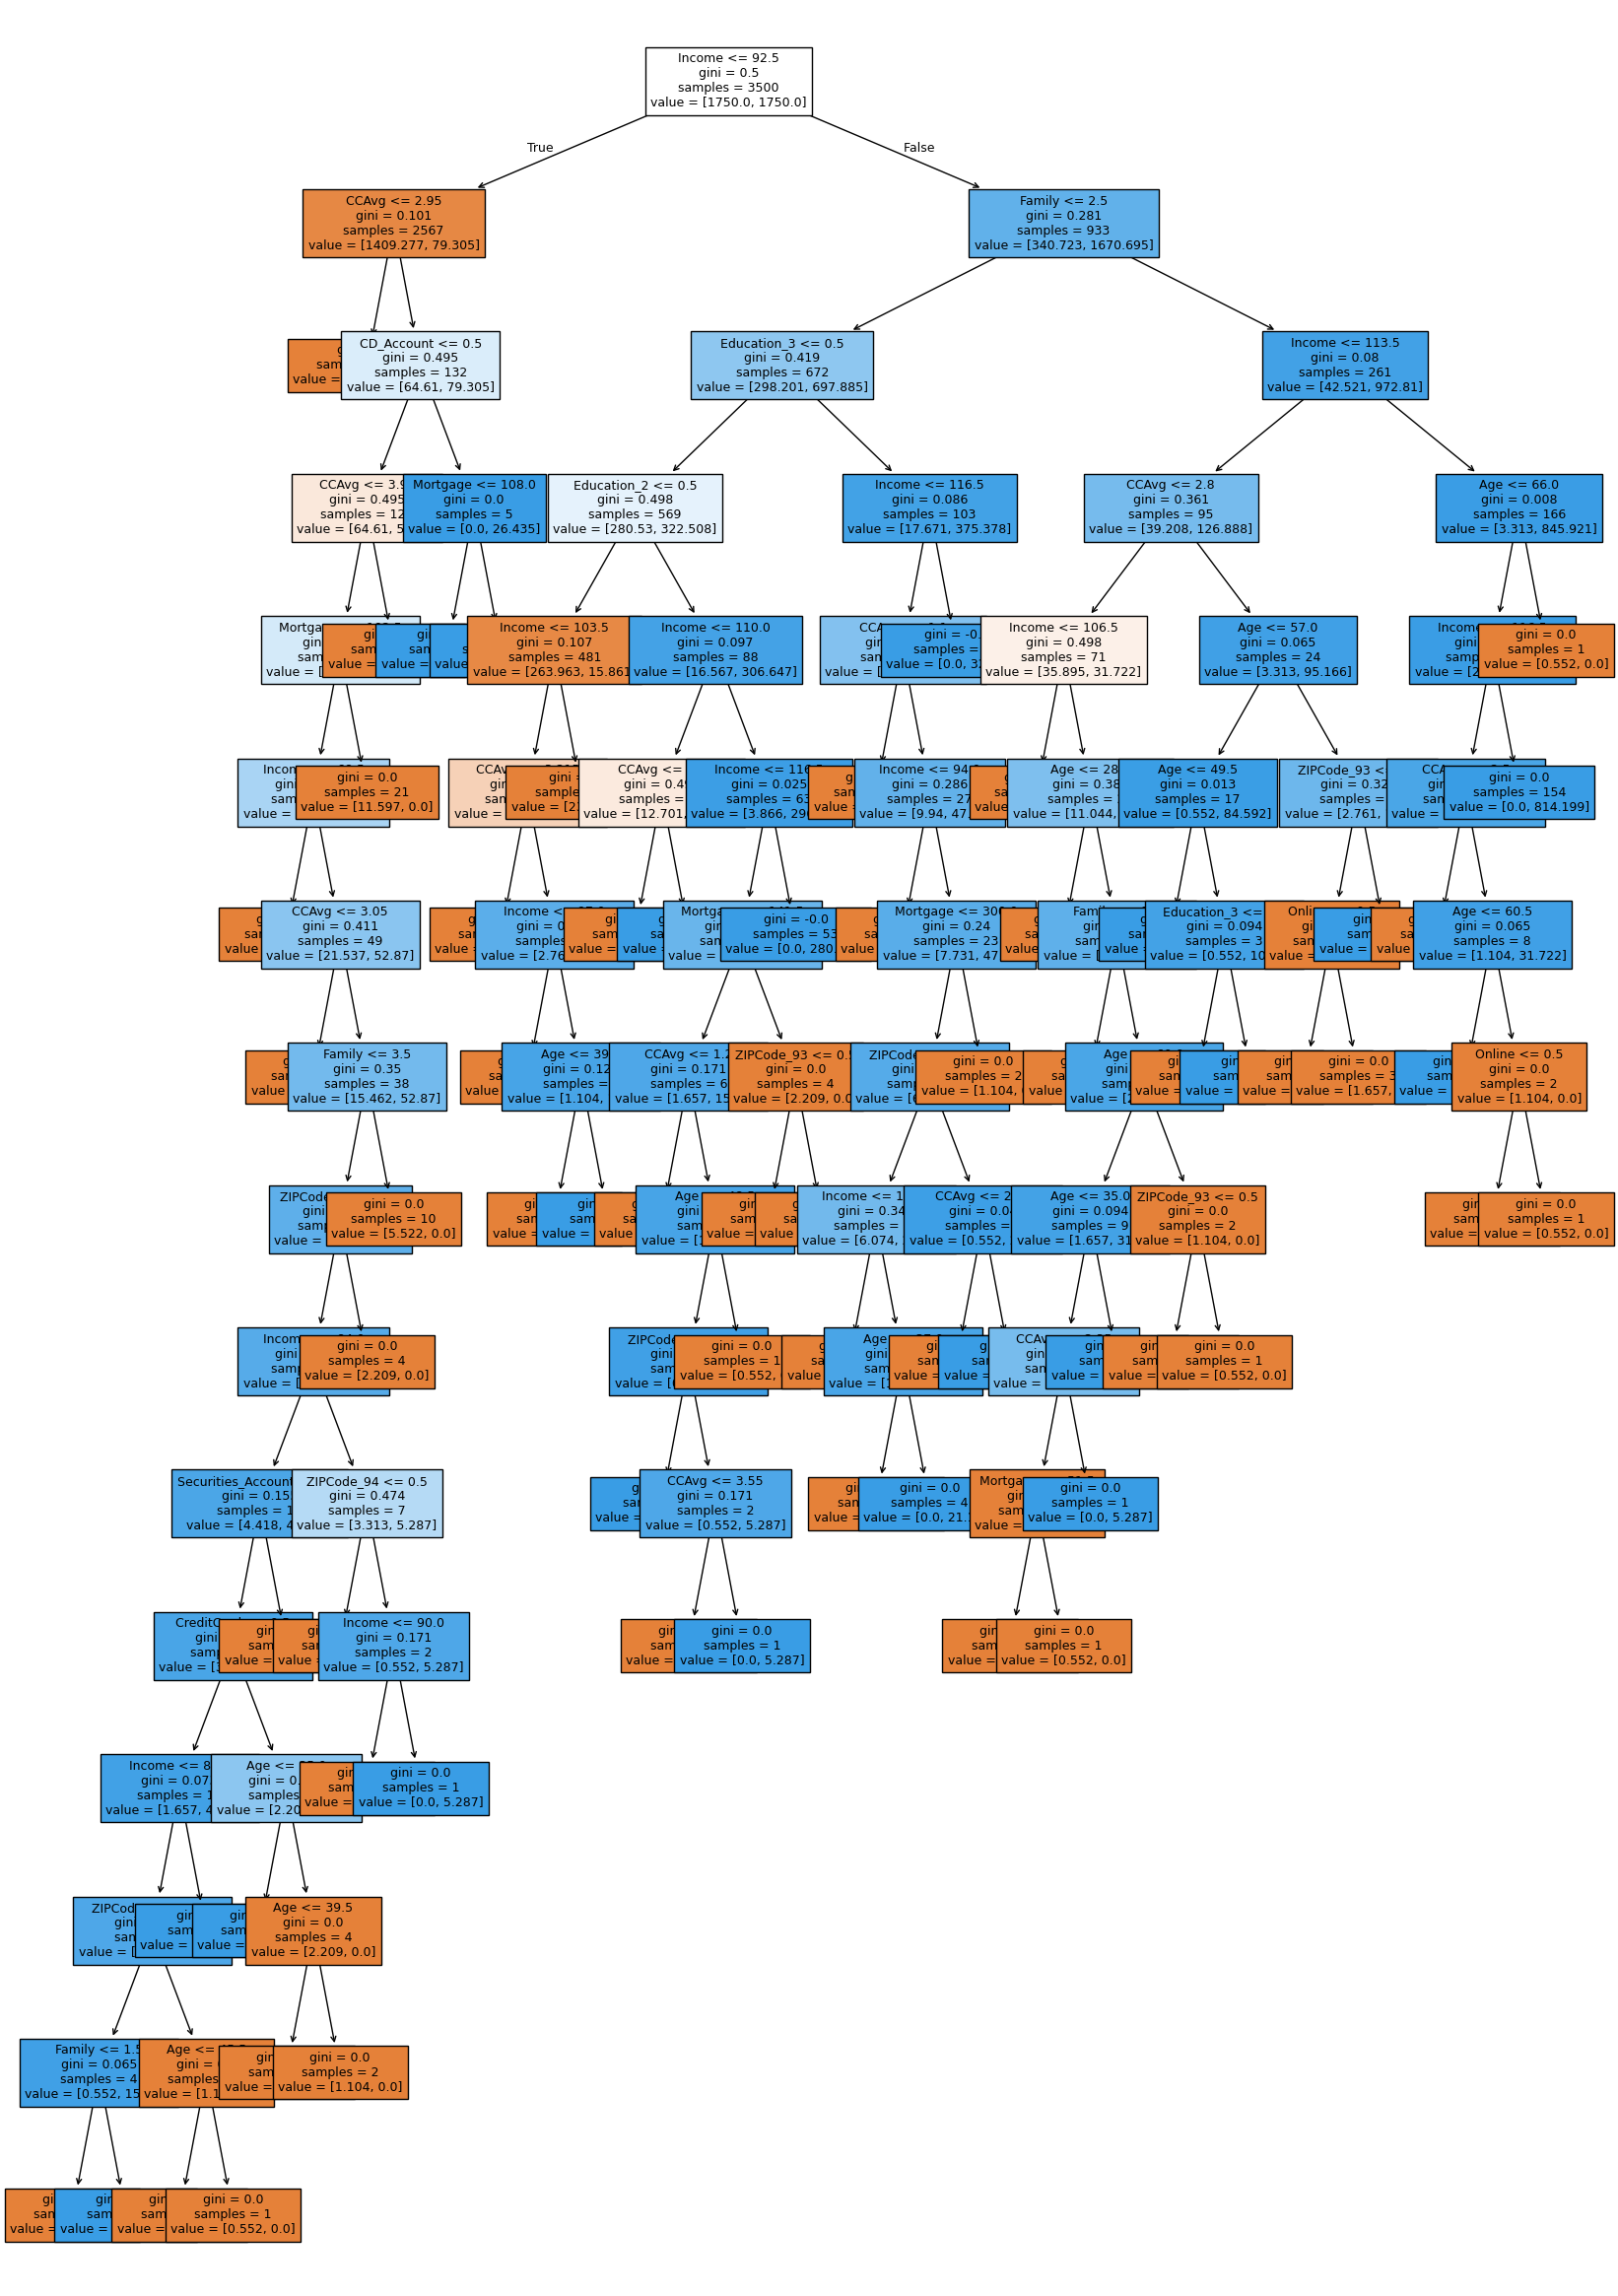

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    LoanDTree2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* The tree is still complex and we difinietly need post and pre pruning.

## Model Performance Improvement

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [ ]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

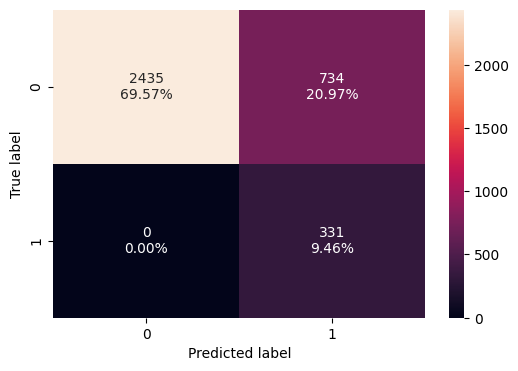

In [ ]:
confusion_matrix_skl(model2, X_train, y_train)

* this confusion matrix is for the training data on the tree with class_weight = balanced

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


* * this performance details is for the training data on the tree (model 2) during prepruning

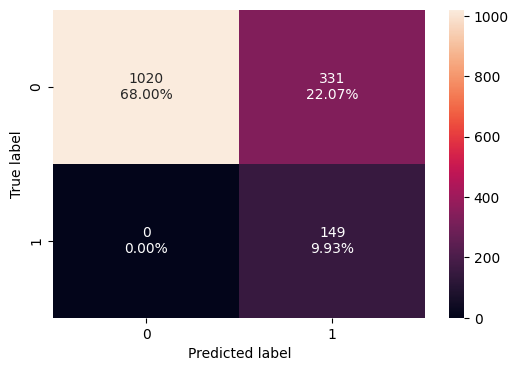

In [ ]:
confusion_matrix_skl(model2, X_test, y_test)


In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


* * this performance details is for the test data on the tree (model 2) during prepruning

In [ ]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

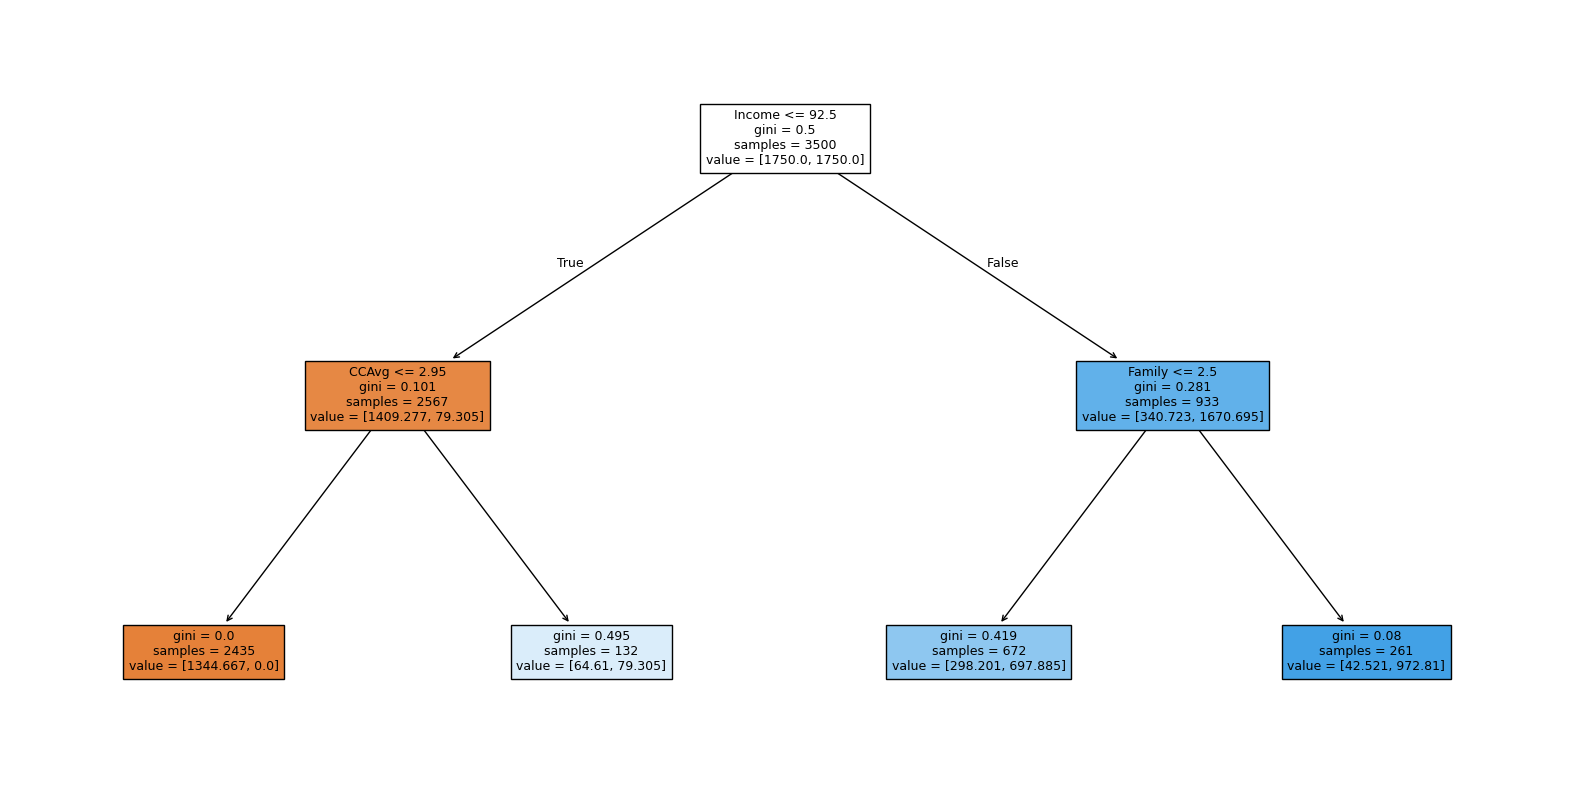

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* After prepruning the tree became simple with only 2 levels and we found the gini = 0 as pure node for 2435 data records where CCAvg <=2.95

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



In [ ]:
importances = model2.feature_importances_
importances

array([0.        , 0.87652937, 0.05653065, 0.06693998, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

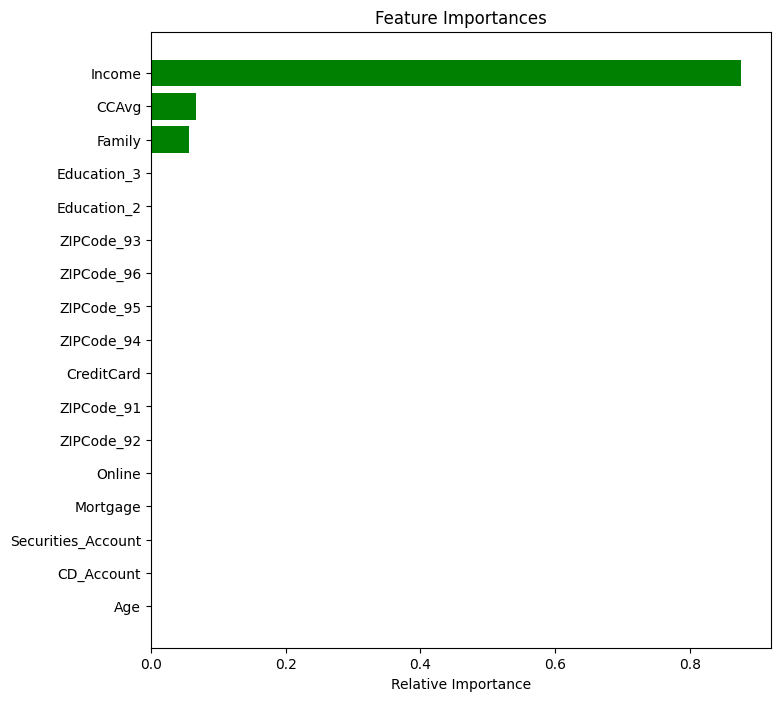

In [ ]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# * Income and CCAVG and Family are the important features for the pre pruning deicision tree .

**Decision Tree (Post pruning)**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)


,ccp_alphas,impurities
0,0.000000e+00,-7.759588e-16
1,3.853725e-19,-7.755734e-16
2,4.729571e-19,-7.751004e-16
3,5.255079e-19,-7.745749e-16
4,5.255079e-19,-7.740494e-16
5,7.707449e-19,-7.732787e-16
6,1.051016e-18,-7.722277e-16
7,1.576524e-18,-7.706511e-16
8,1.257806e-17,-7.580731e-16
9,1.524700e-04,3.049400e-04


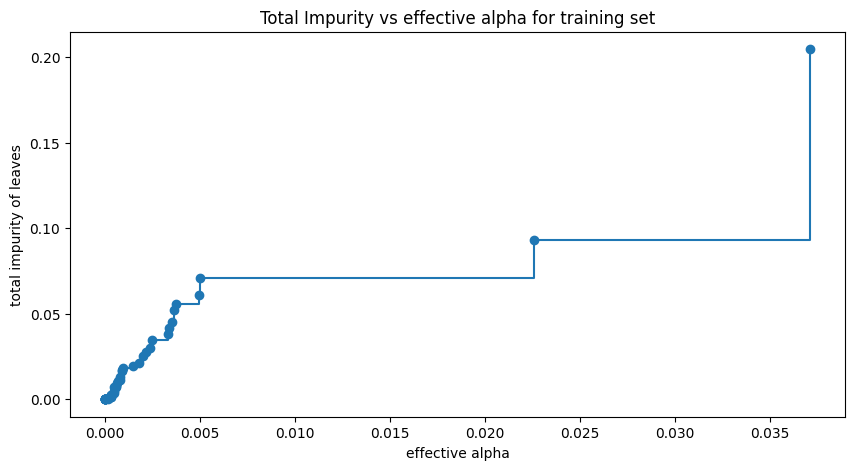

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992314


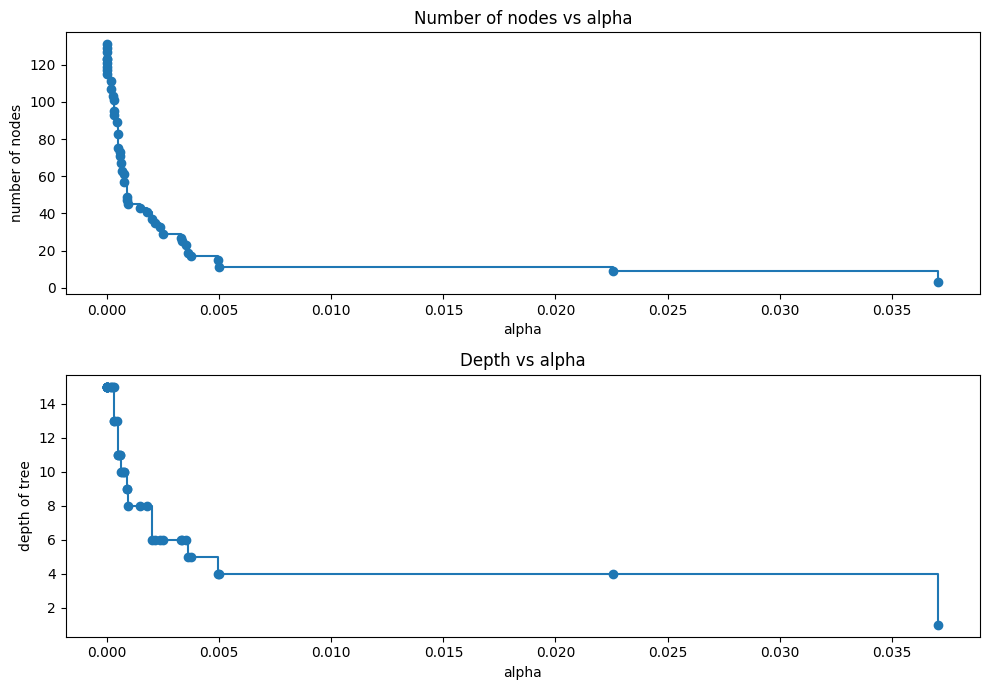

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

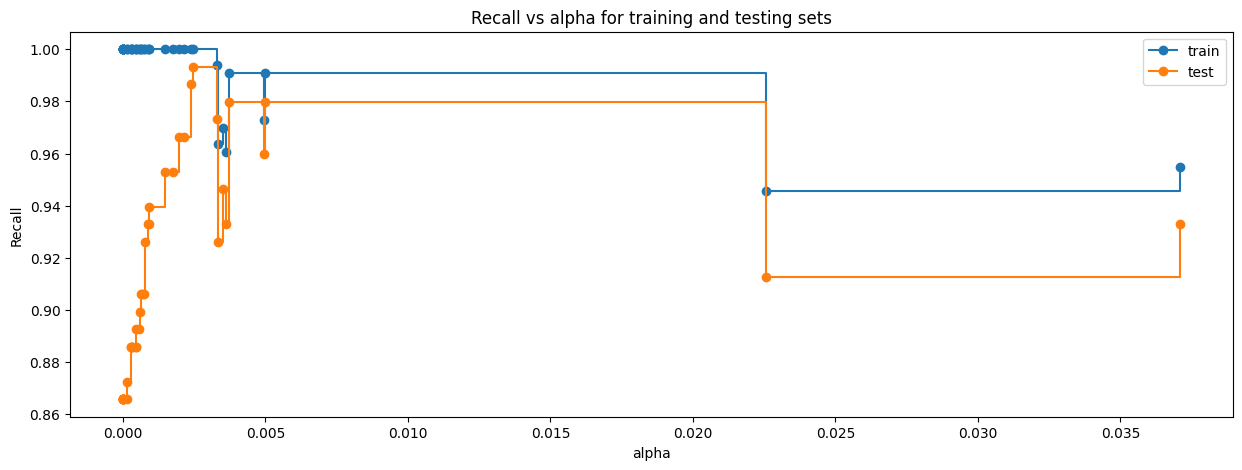

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0024726598786422157),
                       class_weight='balanced', random_state=1)


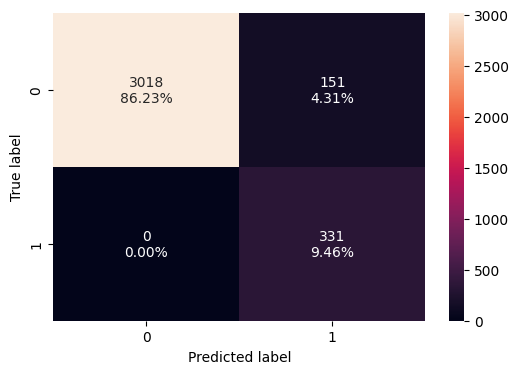

In [ ]:
model4 = best_model
confusion_matrix_skl(model4, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


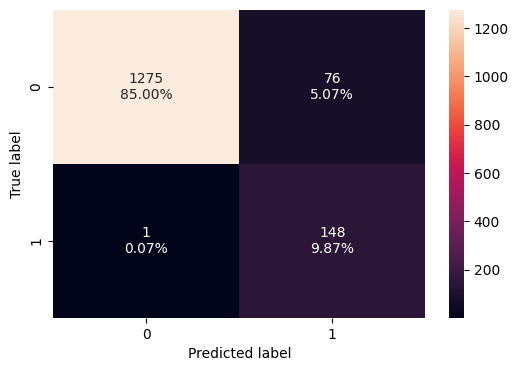

In [ ]:
confusion_matrix_skl(model4, X_test, y_test)


In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


* Model 4 recall value is 0.99 is almost near to recall value received in pre pruning.

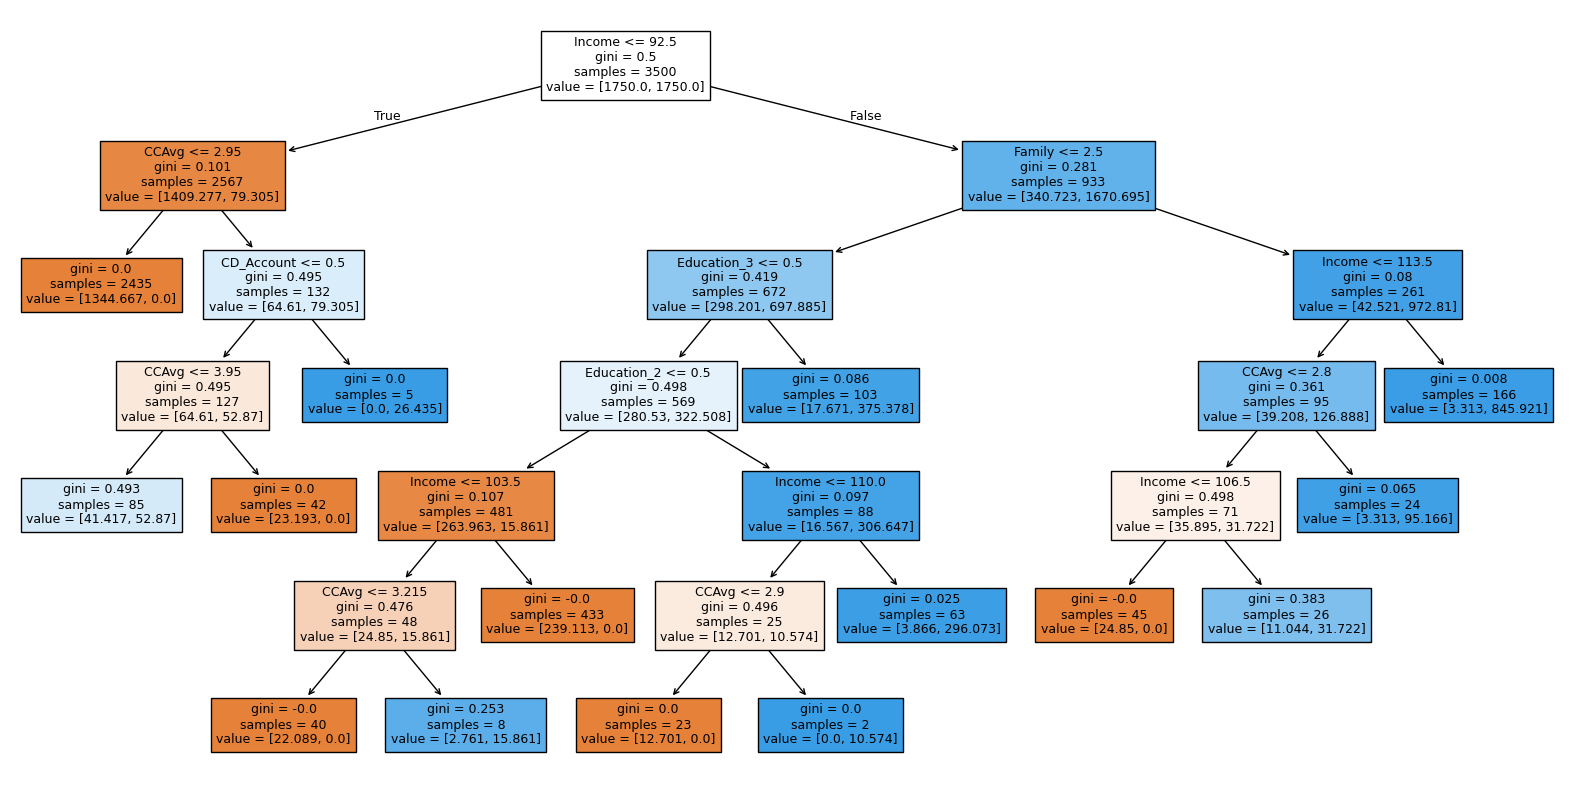

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#Observation
* gini index 0 (orange color) shows the pure leaf node in the data set. however the tree is little complex than tree created pre pruning. However the samples received in post pruning is much more filtered data i.e CCAvg <= 3.95 ( 42 customers) in the left side of the tree
* in the right side of tree the gini index =0 with CCAvg <= 3.215 ( 40 customers) in leave node and CCAvg <=2.9 (23 customers)

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights: [12

In [ ]:
importances = model4.feature_importances_
indices = np.argsort(importances)

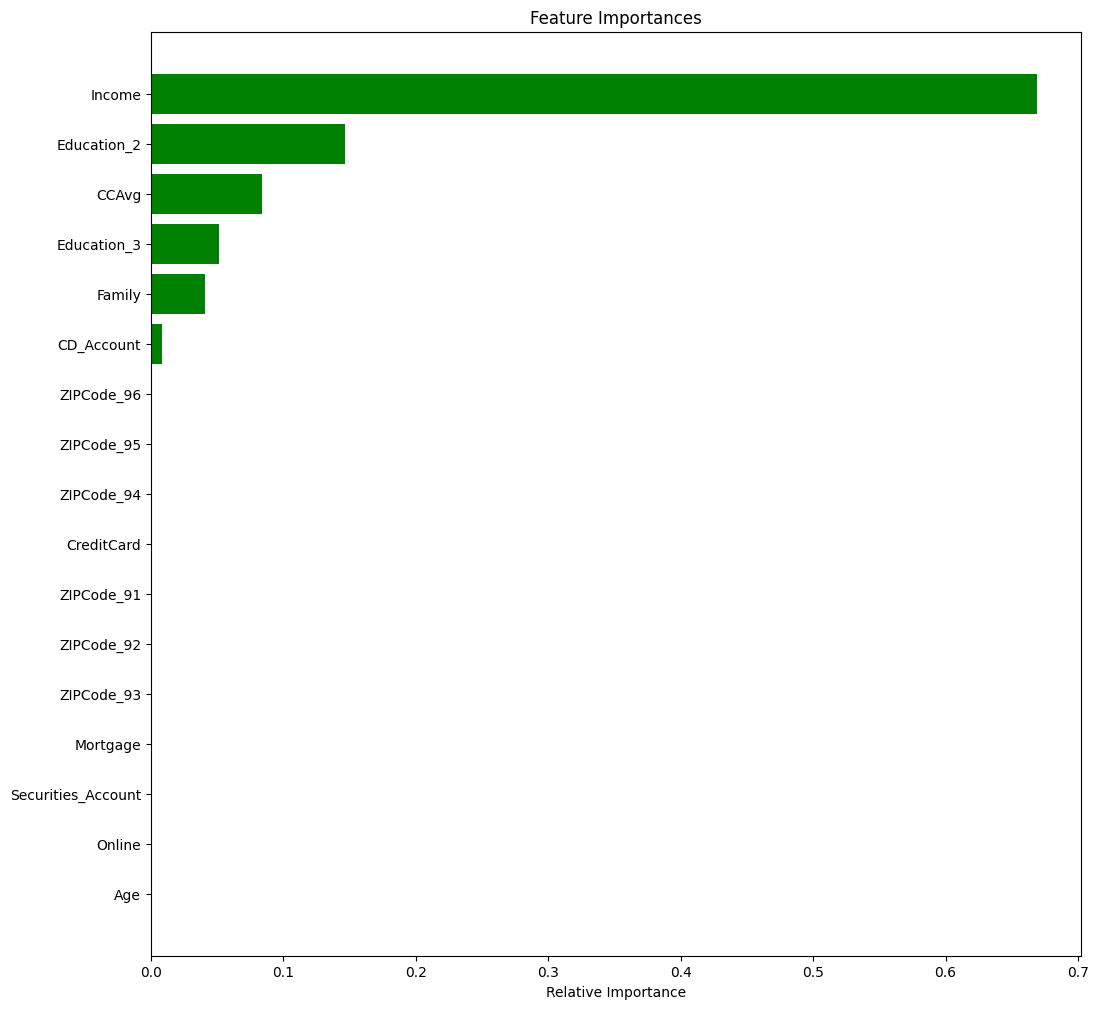

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# * Income and Education_2 (level2) and CCAvg are important features in the post pruning decision tree (model 4)

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        LoanDTree_train_perf.T,
        LoanDTree_train_perf_balanced.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training data performance comparison:")
models_train_comp_df

Training data performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


 The Training data performance Recall score value for Pre pruning shows the highest value as 1 and Post-Pruning also giving scrore as 1.

In [ ]:
# Test performance comparison

LoanDF_model_comparision = pd.concat(
    [
        LoanDTree_test_perf.T,
        LoanDTree_test_perf_balanced.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
LoanDF_model_comparision.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test Data performance comparison:")
LoanDF_model_comparision

Test Data performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.978667,0.779333,0.948667
Recall,0.932886,0.865772,1.000000,0.993289
Precision,0.926667,0.914894,0.310417,0.660714
F1,0.929766,0.889655,0.473768,0.793566


* The Test data performance Recall score value for Pre pruning shows the highest value as 1 and Post-Pruning slightly less as 0.9932.

## Actionable Insights and Business Recommendations



*   The model built can be used to predict the number of customers found in the pre pruning decision tree that can be targeted to receive offer from bank to get a personal loan.

* The income and CCAvg is the most important columns , the bank should  consider before offering a personal loan to its customers.

* From the differnt decision tree, it has been observed that prepruning of deicision tree makes it simple visialize but accurate number of target customer are found in post pruning.

* From the decision_tree_tune_perf_train (prepruning) if the Income is less than or equal to 92.5
and CCAvg less than or equal to 2.95 then the group of customer can be offered for a personal loan
* From decision_tree_post_test if the Income is less than or equal to 92.5 and CCAvg lessthan 2.95 with CD_Account less than 0.5
and ccAvg lessand equal to 3.95 then accuratly 42 customers can be offered for a personal loan
also the Income is less than or equal to 92.5 and family <=2.5 with education_3 <=05 and
Education_2 <=0.5
 with income less than 103.5 and ccavg <= 3.215 we have 40 customers that can be targeted ,
 * also
 Education_2 >=0.5
 with income less than 110 and ccavg <= 2.9 we have 23 customers that can be targeted to offer
 personal loan

* The Bank should use more data points for the analysis to get more reliable results . there are some invalid data (e.g experience) where data were formated. so reliable data source should be present.

* Normalization of data would create accurate and perfect model e.g customer personal details e.g (location zip code , no of family members etc) can be separated which makes no relevance to the personal loan application.

___